# Test results

Test results visually by running tests on hold out data and comparing detected vs true bounding boxes.

Green are detected bounding boxes, red are true bounding boxes.

In [1]:
import os
import sys
import json

import pandas as pd
import numpy as np
import tensorflow as tf
import cv2

from matplotlib import pyplot as plt
from IPython.display import display

from test_model import get_graph_tensors, process_image

In [2]:
PATH_TO_CKPT = 'exported_graphs/frozen_inference_graph.pb'

TESTING_FILE = 'input_data/test_files.csv'

In [3]:
# Load model
graph, tensor_dict, input_image_tensor = get_graph_tensors(PATH_TO_CKPT)

In [4]:
# load data
df = pd.read_csv(TESTING_FILE, header=0, index_col=0)

# Display some samples
with pd.option_context('display.max_rows', 5, 'display.max_columns', 3):
    display(df)

,path,boxes
0,/Users/42155/Workspace/tensorflow_experiments/...,"[[419, 825, 718, 1042], [297, 734, 396, 849], ..."
1,/Users/42155/Workspace/tensorflow_experiments/...,"[[617, 769, 718, 994], [299, 654, 391, 761], [..."
...,...,...
478,/Users/42155/Workspace/tensorflow_experiments/...,"[[491, 102, 718, 427], [446, 674, 717, 868], [..."
479,/Users/42155/Workspace/tensorflow_experiments/...,"[[489, 86, 716, 400], [436, 664, 716, 845], [5..."


In [5]:
def eval_img(image, graph, tensor_dict, input_image_tensor):
    with graph.as_default():
        with tf.Session() as session:
            # Get predictions
            image = process_image(image, session, tensor_dict, input_image_tensor)
            return image

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_2619.jpg
(720, 1280, 3)


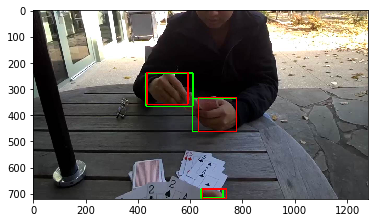

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/JENGA_COURTYARD_H_B/frame_2605.jpg
(720, 1280, 3)


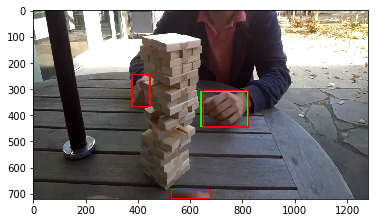

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/PUZZLE_LIVINGROOM_T_B/frame_2578.jpg
(720, 1280, 3)


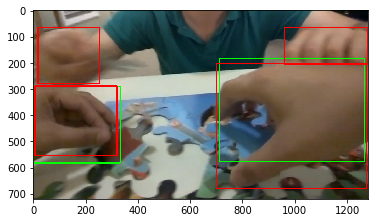

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_2491.jpg
(720, 1280, 3)


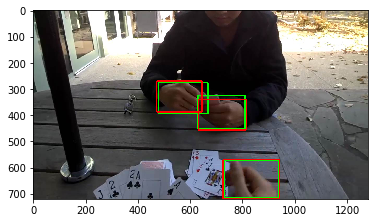

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/PUZZLE_OFFICE_S_T/frame_2476.jpg
(720, 1280, 3)


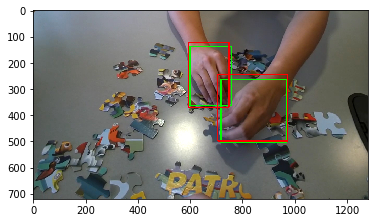

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/JENGA_OFFICE_H_T/frame_2571.jpg
(720, 1280, 3)


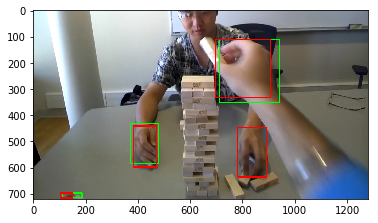

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CHESS_COURTYARD_H_S/frame_2531.jpg
(720, 1280, 3)


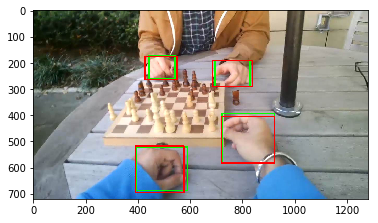

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_T_B/frame_2580.jpg
(720, 1280, 3)


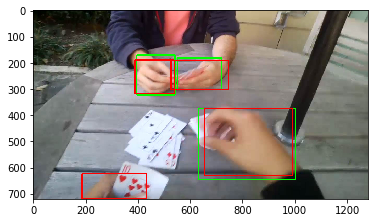

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_H_S/frame_2533.jpg
(720, 1280, 3)


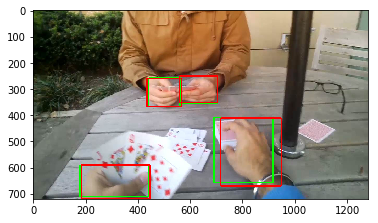

/Users/42155/Workspace/tensorflow_experiments/input_data/downloads/egohands_data/_LABELLED_SAMPLES/CHESS_OFFICE_T_H/frame_2535.jpg
(720, 1280, 3)


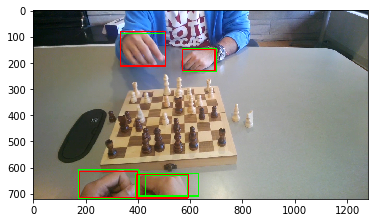

In [6]:
for _, row in df.sample(n=10).iterrows():
    # Load path and boxes
    path = row['path']
    boxes_list = json.loads(row['boxes'])
    # Visualise boxes
    print(path)
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = eval_img(img, graph, tensor_dict, input_image_tensor)
    for (ymin, xmin, ymax, xmax) in boxes_list:
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 3) 
    plt.imshow(img)
    plt.show()